In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Load the Titanic dataset
df = pd.read_csv('titanic/train.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# Preprocess the data
# Select features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df_features = df[features].copy()

# Handle missing values
df_features['Age'].fillna(df_features['Age'].median(), inplace=True)
df_features['Embarked'].fillna(df_features['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
df_features['Sex'] = df_features['Sex'].map({'male': 0, 'female': 1})
df_features = pd.get_dummies(df_features, columns=['Embarked'], drop_first=True)

print(df_features.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0       3    0  22.0      1      0   7.2500       False        True
1       1    1  38.0      1      0  71.2833       False       False
2       3    1  26.0      0      0   7.9250       False        True
3       1    1  35.0      1      0  53.1000       False        True
4       3    0  35.0      0      0   8.0500       False        True


In [5]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

print("Scaled features shape:", X_scaled.shape)

Scaled features shape: (891, 8)


In [6]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained variance ratio:", explained_variance)
print("Cumulative variance:", cumulative_variance)

Explained variance ratio: [0.2300211  0.21295421 0.19345253 0.10485781 0.09260637 0.06990875
 0.05178694 0.04441229]
Cumulative variance: [0.2300211  0.44297531 0.63642784 0.74128565 0.83389202 0.90380077
 0.95558771 1.        ]


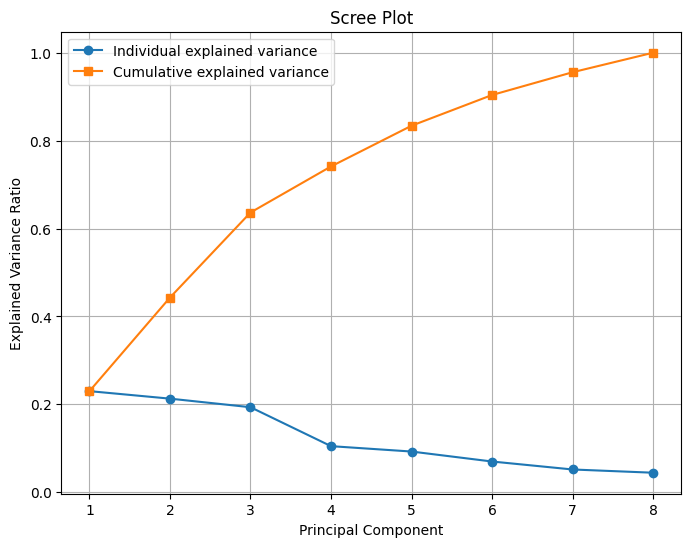

In [7]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'o-', label='Individual explained variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 's-', label='Cumulative explained variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Display PCA components (loadings)
components_df = pd.DataFrame(pca.components_, columns=df_features.columns, index=[f'PC{i+1}' for i in range(len(pca.components_))])
print("PCA Components (loadings):")
print(components_df)

PCA Components (loadings):
       Pclass       Sex       Age     SibSp     Parch      Fare  Embarked_Q  \
PC1 -0.512372  0.330039  0.103034  0.266860  0.369539  0.600778   -0.219900   
PC2 -0.425497 -0.180574  0.530351 -0.507707 -0.465355  0.132517   -0.053585   
PC3 -0.016727 -0.262605  0.039319  0.029439  0.022672 -0.110764   -0.658626   
PC4  0.024482  0.838888 -0.053989 -0.423504 -0.045719 -0.248464   -0.118191   
PC5  0.146954  0.092752  0.797337  0.221455  0.356010 -0.287428    0.232410   
PC6  0.094281 -0.252839 -0.056017 -0.637285  0.698256  0.047609   -0.075211   
PC7 -0.013374 -0.044273 -0.107545 -0.179031 -0.005017  0.374810    0.625431   
PC8  0.724490  0.106218  0.230653 -0.059752 -0.173065  0.567572   -0.224009   

     Embarked_S  
PC1   -0.029498  
PC2   -0.101581  
PC3    0.694100  
PC4    0.188688  
PC5    0.147110  
PC6   -0.149761  
PC7    0.650055  
PC8   -0.069221  
